## Thief in the Treasure Room

In this problem, a thief broke into the treasure room in the king's palace. There are a thousand pieces of gold and jewels in the treasure room, and the thief took with him a bag that can hold a maximum of twenty items. 

The problem the thief faces is to maximize the total value of the items to be stolen (which he somehow knows) while minimizing the total weight of the loot to facilitate his escape.

This is a multi-objective adaptation of the [Knapsack  problem](https://en.wikipedia.org/wiki/Knapsack_problem).

In [1]:
import mosa
from numpy import random

%matplotlib inline

In [2]:
random.seed(0)

The values of the pieces, in kingdom currency, and their weights, in kg, are fictitious and generated by the code snippet below.

In [3]:
Weight = random.uniform(0.5, 5.0, 1000)
Weight.sort()
Value = Weight * random.uniform(100.0, 300.0, 1000)

### Translating the Thief in the Treasure Room problem into Python code

The function *fobj* below implements the problem. 

The solution to the problem is *Items*, which is a list of the items stolen by the thief.

Objectives are simply the sum of the values and weights of stolen items. 

In [4]:
def fobj(Items):
    value = Value[Items]
    weight = Weight[Items]

    return -sum(value), sum(weight)

### Initialization

In [5]:
opt = mosa.Anneal()

--------------------------------------------------
 MULTI-OBJECTIVE SIMULATED ANNEALING (MOSA) 0.8.5  
--------------------------------------------------


In [6]:
opt.set_population(Items=[i for i in range(1000)])

In [7]:
opt.initial_temperature = 1.0
opt.number_of_temperatures = 100
opt.number_of_iterations = 2000
opt.objective_weights = [(Value.max() - Value.min()), (Weight.max() - Weight.min())]
opt.archive_size = 1000
opt.maximum_archive_rejections = 1000

In [8]:
opt.set_opt_param("distinct_elements", Items=True)
opt.set_opt_param("sort_elements", Items=True)
opt.set_opt_param("mc_step_size", Items=50)

In each Monte Carlo iteration, one of two possible trial moves is selected. The first, which occurs with a probability of 70%, consists of replacing an element in the solution with an element taken from the population. The second type of trial move, which occurs with a 30% probability, involves adding an element to the solution (15% probability) or removing an element from the solution (15% probability), therefore changing the amount of solution elements, if accepted.

The initial number of solution elements is five and the maximum number is twenty. The number of solution elements can vary between one and twenty.

In [9]:
opt.set_opt_param("change_value_move", Items=0.7)
opt.set_opt_param("insert_or_delete_move", Items=0.3)
opt.set_opt_param("number_of_elements", Items=5)
opt.set_opt_param("maximum_number_of_elements", Items=20)

### Run

In [10]:
%%time
opt.evolve(fobj)

--- BEGIN: Evolving a solution ---

Looking for a solution in the checkpoint file...
No checkpoint file!
Done!
Trying to load the archive from file archive.json...
File archive.json not found! Initializing an empty archive...
Done!
------

Groups in the solution:

    Items:
        Number of elements: 5
        Sample space: discrete
        Size of population group: 1000
        Distinct elements: True
        Selection weight: 1.0
        Weight of 'change value' trial move: 0.7
        Weight of 'insert or delete' trial move: 0.3
        Maximum number of elements: 20
        Sort values: True
        Maximum step size: 50
------
Initializing with a random solution from scratch...
Done!
------
Starting at temperature: 1.000000
Evolving solutions to the problem, please wait...
Too many attempts to insert a solution in the archive failed!
Stopping at temperature: 0.282430
------

--- THE END ---
CPU times: total: 1min 38s
Wall time: 1min 42s


### Output

In [11]:
print(f"Number of solutions stored in the archive: {opt.sizex()}")

Number of solutions stored in the archive: 707


In [12]:
for key, value in opt.get_stats().items():
    print(f"{key}: {value}")

Min: [-13598.44141336934, 0.5024568420364804]
Max: [-79.70394175239615, 65.79754573557155]
Avg: [-3515.060503707216, 14.39002829392171]
Std: [3035.024859873298, 13.52879587767137]


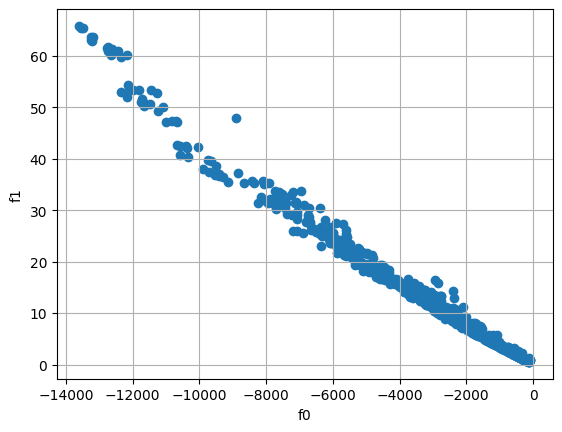

In [13]:
opt.plot_front()

### Removing dominated solutions

In [14]:
%%time
pruned = opt.prune_dominated()
print(f"Number of solutions stored in the pruned archive: {opt.sizex(pruned)}")

Number of solutions stored in the pruned archive: 197
CPU times: total: 46.9 ms
Wall time: 80.2 ms


In [15]:
for key, value in opt.get_stats().items():
    print(f"{key}: {value}")

Min: [-13598.44141336934, 0.5024568420364804]
Max: [-79.70394175239615, 65.79754573557155]
Avg: [-3515.060503707216, 14.39002829392171]
Std: [3035.024859873298, 13.52879587767137]


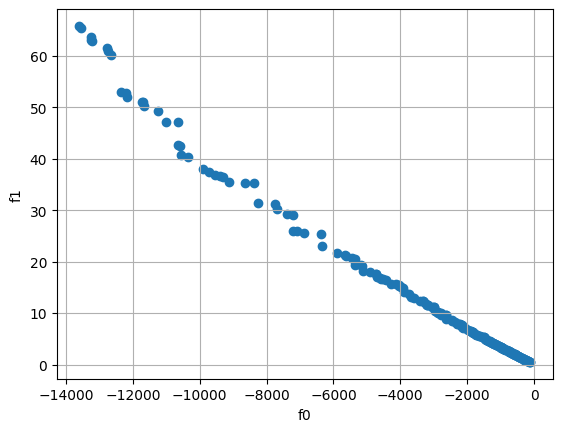

In [16]:
opt.plot_front(pruned)

### Decision making

Many solutions (i.e., different possible sets of stolen pieces) still remain in the archive and it is hard for the thief to choose one or two out of them.

In order to reduce the solution set to something a human being is able to deal with, first, the *trimx* method is used to select the sets of stolen pieces that are below a maximum weight, in this case, 20 kg.

In [17]:
trimmed = opt.trimx(xset=pruned, thresholds=[None, 20])
print(f"Number of solutions stored in the reduced archive: {opt.sizex(trimmed)}")

Number of solutions stored in the reduced archive: 153


Finally, we narrowed down the options even further by calling the *reducex* method. The ten solutions that contain the most valuable sets of pieces in the king's treasury, whose total weight is less than 20 kg, are presented.

In [18]:
sol = opt.reducex(xset=trimmed, index=0, nel=10)
opt.printx(sol)

0) Items: [276, 325, 501, 537, 603, 681, 773] ===> [-5348.185076769243, 19.86999608882114]
1) Items: [248, 405, 412, 551, 552, 581, 838] ===> [-5348.113939327506, 19.390611314790082]
2) Items: [3, 52, 393, 522, 745, 868, 941] ===> [-5172.7925480079275, 19.292160029498383]
3) Items: [84, 88, 149, 253, 261, 437, 446, 456, 525, 537] ===> [-5138.898516900009, 19.187075926516606]
4) Items: [779, 890, 949, 957] ===> [-5105.177035648809, 18.176539146239037]
5) Items: [458, 483, 520, 581, 603, 761] ===> [-4910.850290230569, 17.896377542132534]
6) Items: [32, 276, 325, 501, 603, 681, 773] ===> [-4737.020008000758, 17.6800812227125]
7) Items: [77, 168, 254, 884, 889, 968] ===> [-4714.015533771196, 17.648123624449468]
8) Items: [50, 227, 329, 681, 884, 928] ===> [-4698.986207445174, 17.045446602012273]
9) Items: [50, 195, 329, 681, 884, 928] ===> [-4608.1583988354105, 16.90115775014926]
